In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def draw(x1,x2):
    ln = plt.plot(x1,x2, '-')
    plt.pause(0.0001)
    ln[0].remove()

def sigmoid(score):
    return 1/(1+ np.exp(-score))

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = -(1/m)*(np.log(p).T * y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(500):
        p = sigmoid(points * line_parameters)
        gradient = (points.T * (p - y))*(alpha/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(),points[:,0].max()])
        x2 = -b / w2 + x1 * (-w1 /w2)
    draw(x1,x2)
    

In [107]:
n_pts = 200
# np.random.seed(0)
bias = np.ones(n_pts)
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(10, 2, n_pts),bias]).T
bottom_region = np.array([np.random.normal(5,2, n_pts), np.random.normal(6, 2, n_pts),bias]).T
all_points = np.vstack((top_region,bottom_region))
# w1 = -0.2
# w2 = -0.1
# b = 3.5
line_parameters = np.matrix([np.zeros(3)]).T
# x1 = np.array([bottom_region[:, 0].min(),top_region[:,0].max()])
# x2 = -b / w2 + x1 * (-w1 /w2)
# print(x1,x2)
# print(all_points.shape)
# print(line_parameters.shape)
linear_combination =all_points*line_parameters
probabilities = sigmoid(linear_combination)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2,1)
# print(y)


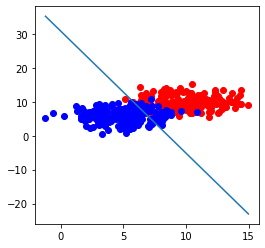

In [108]:
_, ax = plt.subplots(figsize = (4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color = 'red')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color = 'blue')
# draw(x1,x2)
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()

In [109]:
calculate_error(line_parameters, all_points, y)

matrix([[0.69314718]])